In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv('/content/data.csv',delimiter=',',encoding='ISO-8859-1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87742 entries, 0 to 87741
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    87742 non-null  object 
 1   StockCode    87742 non-null  object 
 2   Description  87462 non-null  object 
 3   Quantity     87742 non-null  int64  
 4   InvoiceDate  87742 non-null  object 
 5   UnitPrice    87742 non-null  float64
 6   CustomerID   55910 non-null  float64
 7   Country      87742 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.4+ MB


Description of numeric feature

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,87742.0,8.538761,358.726762,-74215.0,1.00,3.00,8.00,74215.00
UnitPrice,87742.0,5.434216,126.219074,0.0,1.25,2.51,4.25,16888.02
CustomerID,55910.0,15351.550367,1770.622167,12346.0,13871.00,15311.00,17001.00,18283.00


Description of non-numeric features

In [ ]:
data.describe(exclude=['int64','float64']).T

,count,unique,top,freq
InvoiceNo,87742,4038,537434,675
StockCode,87742,3090,85123A,485
Description,87462,2989,WHITE HANGING HEART T-LIGHT HOLDER,495
InvoiceDate,87742,3622,12/6/2010 16:57,675
Country,87742,29,United Kingdom,81317


In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,280
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,31832
Country,0


In [ ]:
 data.shape

(87742, 8)

Delete all the missing records

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(55910, 8)

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Checking of whether negative values present in Quantity and unit price

In [ ]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
87603,C543662,22423,REGENCY CAKESTAND 3 TIER,-5,2/11/2011 10:49,10.95,14441.0,United Kingdom
87604,C543663,22846,BREAD BIN DINER STYLE RED,-1,2/11/2011 10:50,16.95,18118.0,United Kingdom
87634,C543671,22602,RETROSPOT WOODEN HEART DECORATION,-36,2/11/2011 11:24,0.85,18087.0,United Kingdom
87635,C543671,22600,CHRISTMAS RETROSPOT STAR WOOD,-12,2/11/2011 11:24,0.85,18087.0,United Kingdom


In [ ]:
data[data['UnitPrice']<0].shape[0]

0

In [ ]:
data.drop(data[data['Quantity']<0].index,inplace=True)

In [ ]:
data.shape

(54345, 8)

In [ ]:
data['Sales']=data['Quantity']*data['UnitPrice']
new_data=data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,1187.18
2,12348.0,1120.24
3,12350.0,334.40
4,12356.0,2271.62
...,...,...
1445,18250.0,349.27
1446,18259.0,376.30
1447,18260.0,787.77
1448,18269.0,168.60


In [ ]:
type(new_data)

pandas.core.frame.DataFrame

In [ ]:
num_trans=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,60
2,12348.0,23
3,12350.0,17
4,12356.0,36
...,...,...
1445,18250.0,21
1446,18259.0,7
1447,18260.0,37
1448,18269.0,7


In [ ]:
type(num_trans)

pandas.core.frame.DataFrame

In [ ]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
87643,2011-02-11 11:36:00
87644,2011-02-11 11:36:00
87645,2011-02-11 11:38:00
87646,2011-02-11 11:40:00


In [ ]:
data['Last Transaction']=(data['InvoiceDate'].max()-data['InvoiceDate'])

In [ ]:
data['Last Transaction']

,Last Transaction
0,72 days 03:14:00
1,72 days 03:14:00
2,72 days 03:14:00
3,72 days 03:14:00
4,72 days 03:14:00
...,...
87643,0 days 00:04:00
87644,0 days 00:04:00
87645,0 days 00:02:00
87646,0 days 00:00:00


In [ ]:
data['Last Transaction']=data['Last Transaction'].dt.days

In [ ]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,72
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,72
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,72
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,72
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,72
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,72
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,72
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,72
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,72
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,72


In [ ]:
lt=data.groupby(['CustomerID','Country'])['Last Transaction'].max().reset_index()
lt

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,24
1,12347.0,Iceland,65
2,12348.0,Finland,56
3,12350.0,Norway,8
4,12356.0,Portugal,24
...,...,...,...
1446,18250.0,United Kingdom,8
1447,18259.0,United Kingdom,64
1448,18260.0,United Kingdom,56
1449,18269.0,United Kingdom,64


In [ ]:
merge_table=pd.merge(lt,num_trans,how='inner',on='CustomerID')
new_df=pd.merge(merge_table,new_data,how='inner',on='CustomerID')
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,24,1,77183.60
1,12347.0,Iceland,65,60,1187.18
2,12348.0,Finland,56,23,1120.24
3,12350.0,Norway,8,17,334.40
4,12356.0,Portugal,24,36,2271.62
...,...,...,...,...,...
1446,18250.0,United Kingdom,8,21,349.27
1447,18259.0,United Kingdom,64,7,376.30
1448,18260.0,United Kingdom,56,37,787.77
1449,18269.0,United Kingdom,64,7,168.60


Removal of Outliers using boxplot

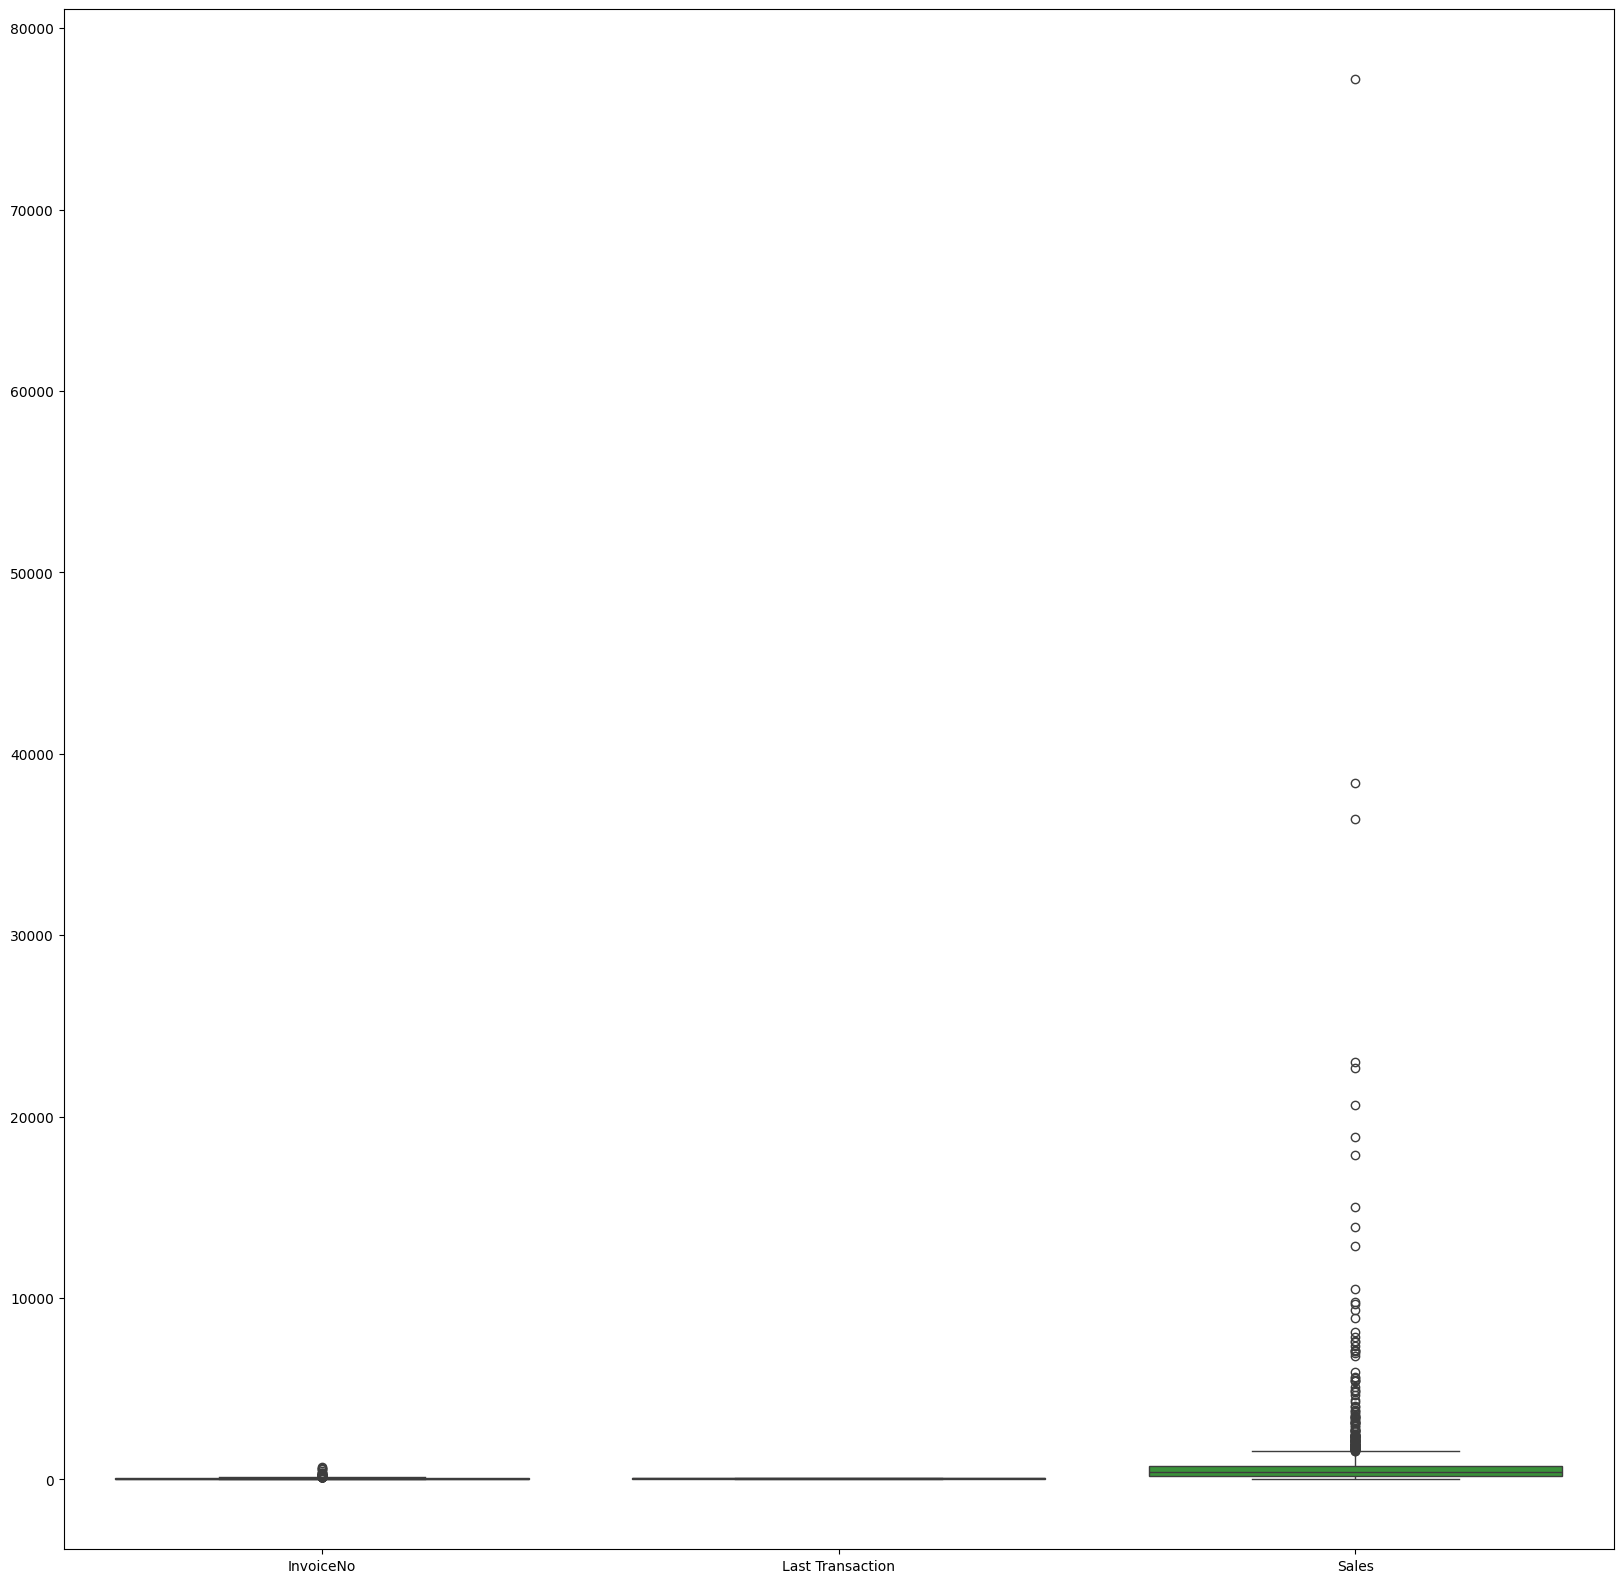

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=new_df[['InvoiceNo','Last Transaction','Sales']])
plt.show()

In [ ]:
IQR=new_df['Sales'].quantile(0.75)-new_df['Sales'].quantile(0.25)
lower_limit=new_df['Sales'].quantile(0.25)-1.5*IQR
upper_limit=new_df['Sales'].quantile(0.75)+1.5*IQR
new_df_iqr = new_df[(new_df['Sales'] < upper_limit) & (new_df['Sales'] > lower_limit)]
new_df_iqr.shape

(1310, 5)

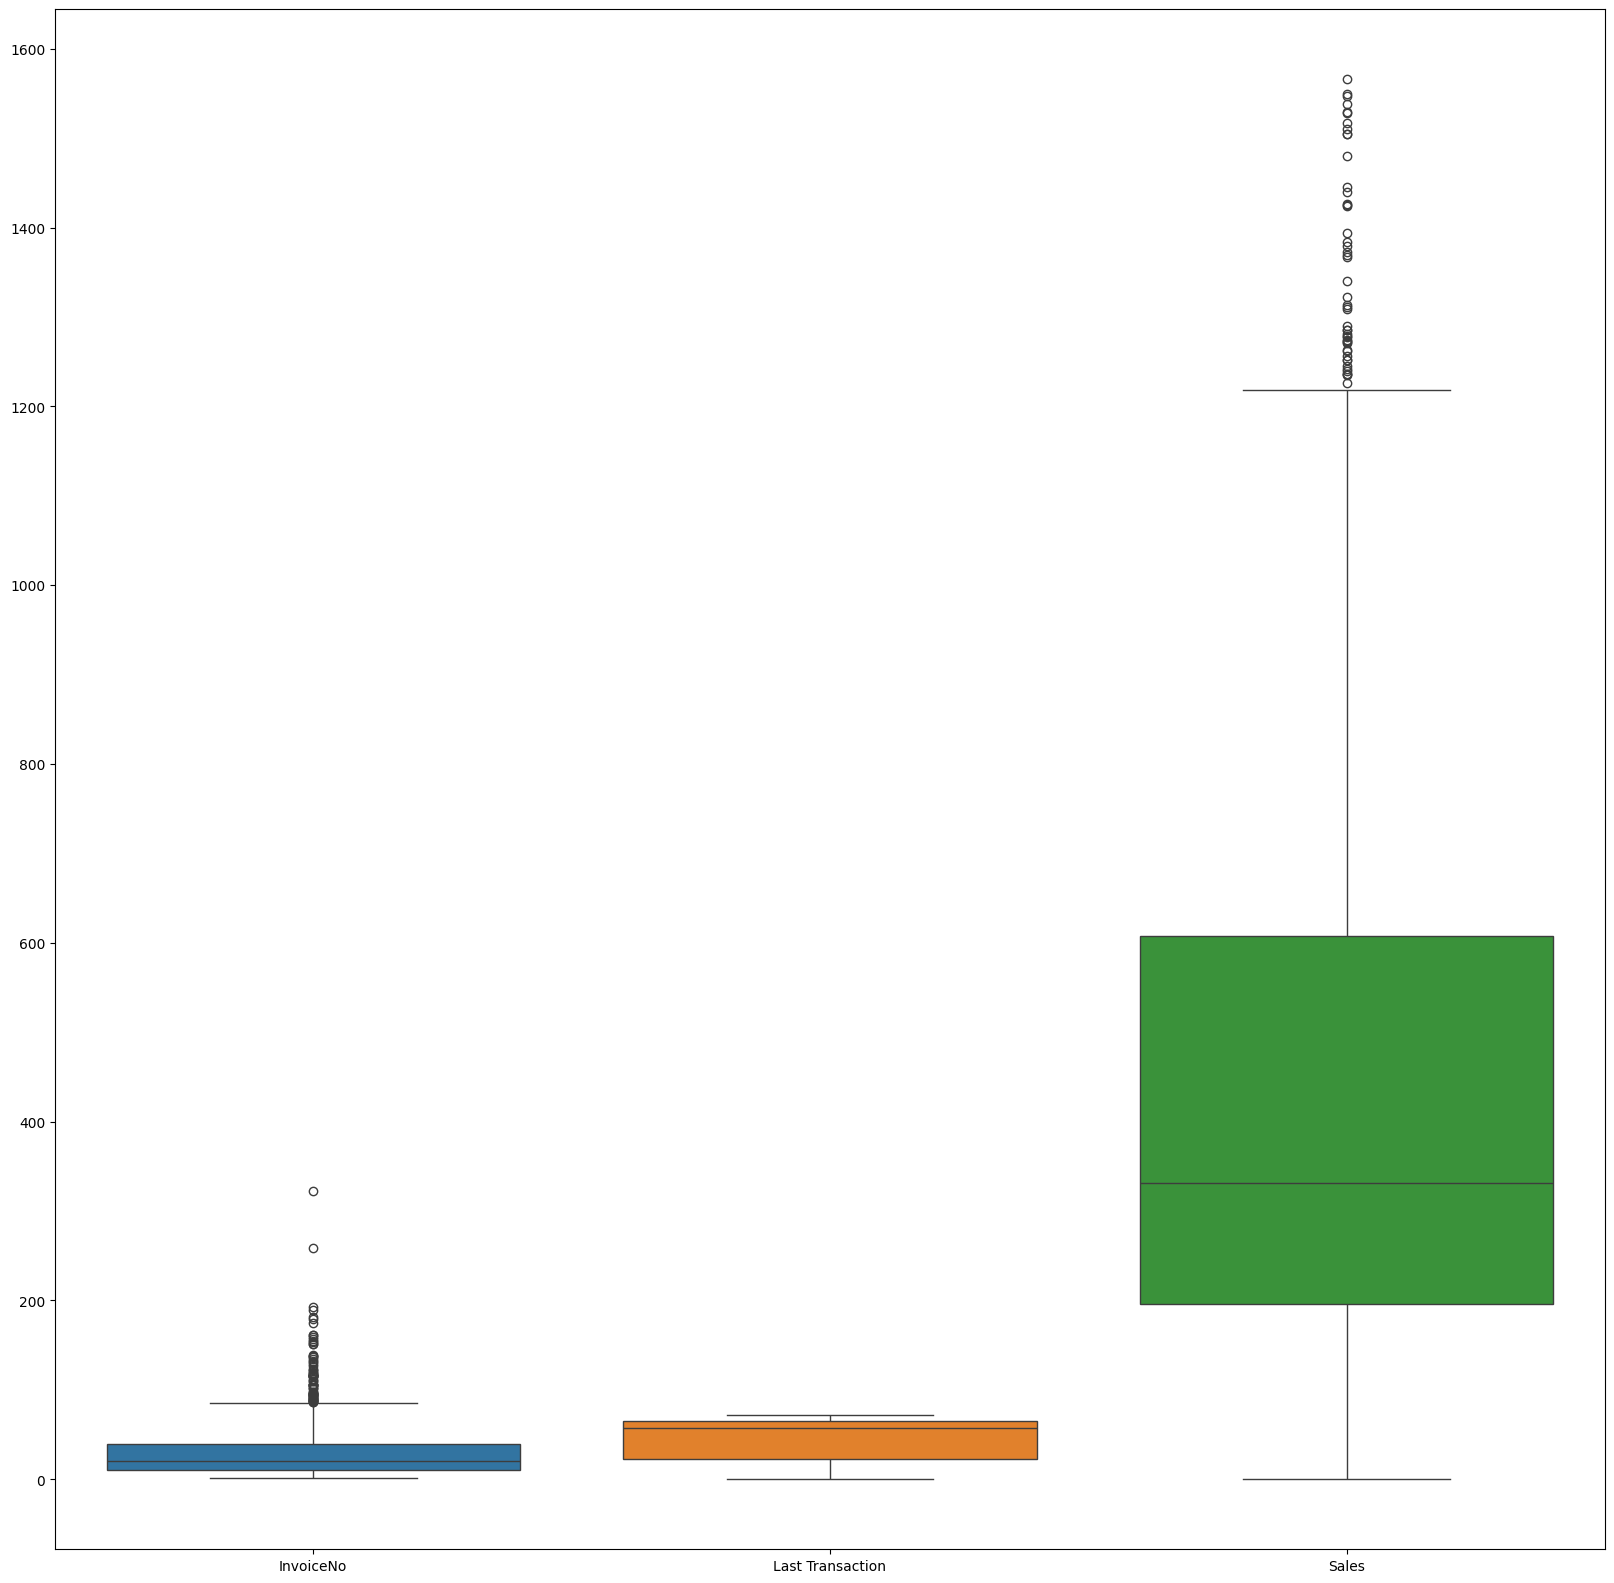

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=new_df_iqr[['InvoiceNo','Last Transaction','Sales']])
plt.show()

In [ ]:
new_df_iqr.reset_index(drop=True,inplace=True)
new_df_iqr

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12347.0,Iceland,65,60,1187.18
1,12348.0,Finland,56,23,1120.24
2,12350.0,Norway,8,17,334.40
3,12373.0,Austria,9,14,364.60
4,12383.0,Belgium,50,68,1251.88
...,...,...,...,...,...
1305,18250.0,United Kingdom,8,21,349.27
1306,18259.0,United Kingdom,64,7,376.30
1307,18260.0,United Kingdom,56,37,787.77
1308,18269.0,United Kingdom,64,7,168.60


Visualization of correlation matrix using heatmap

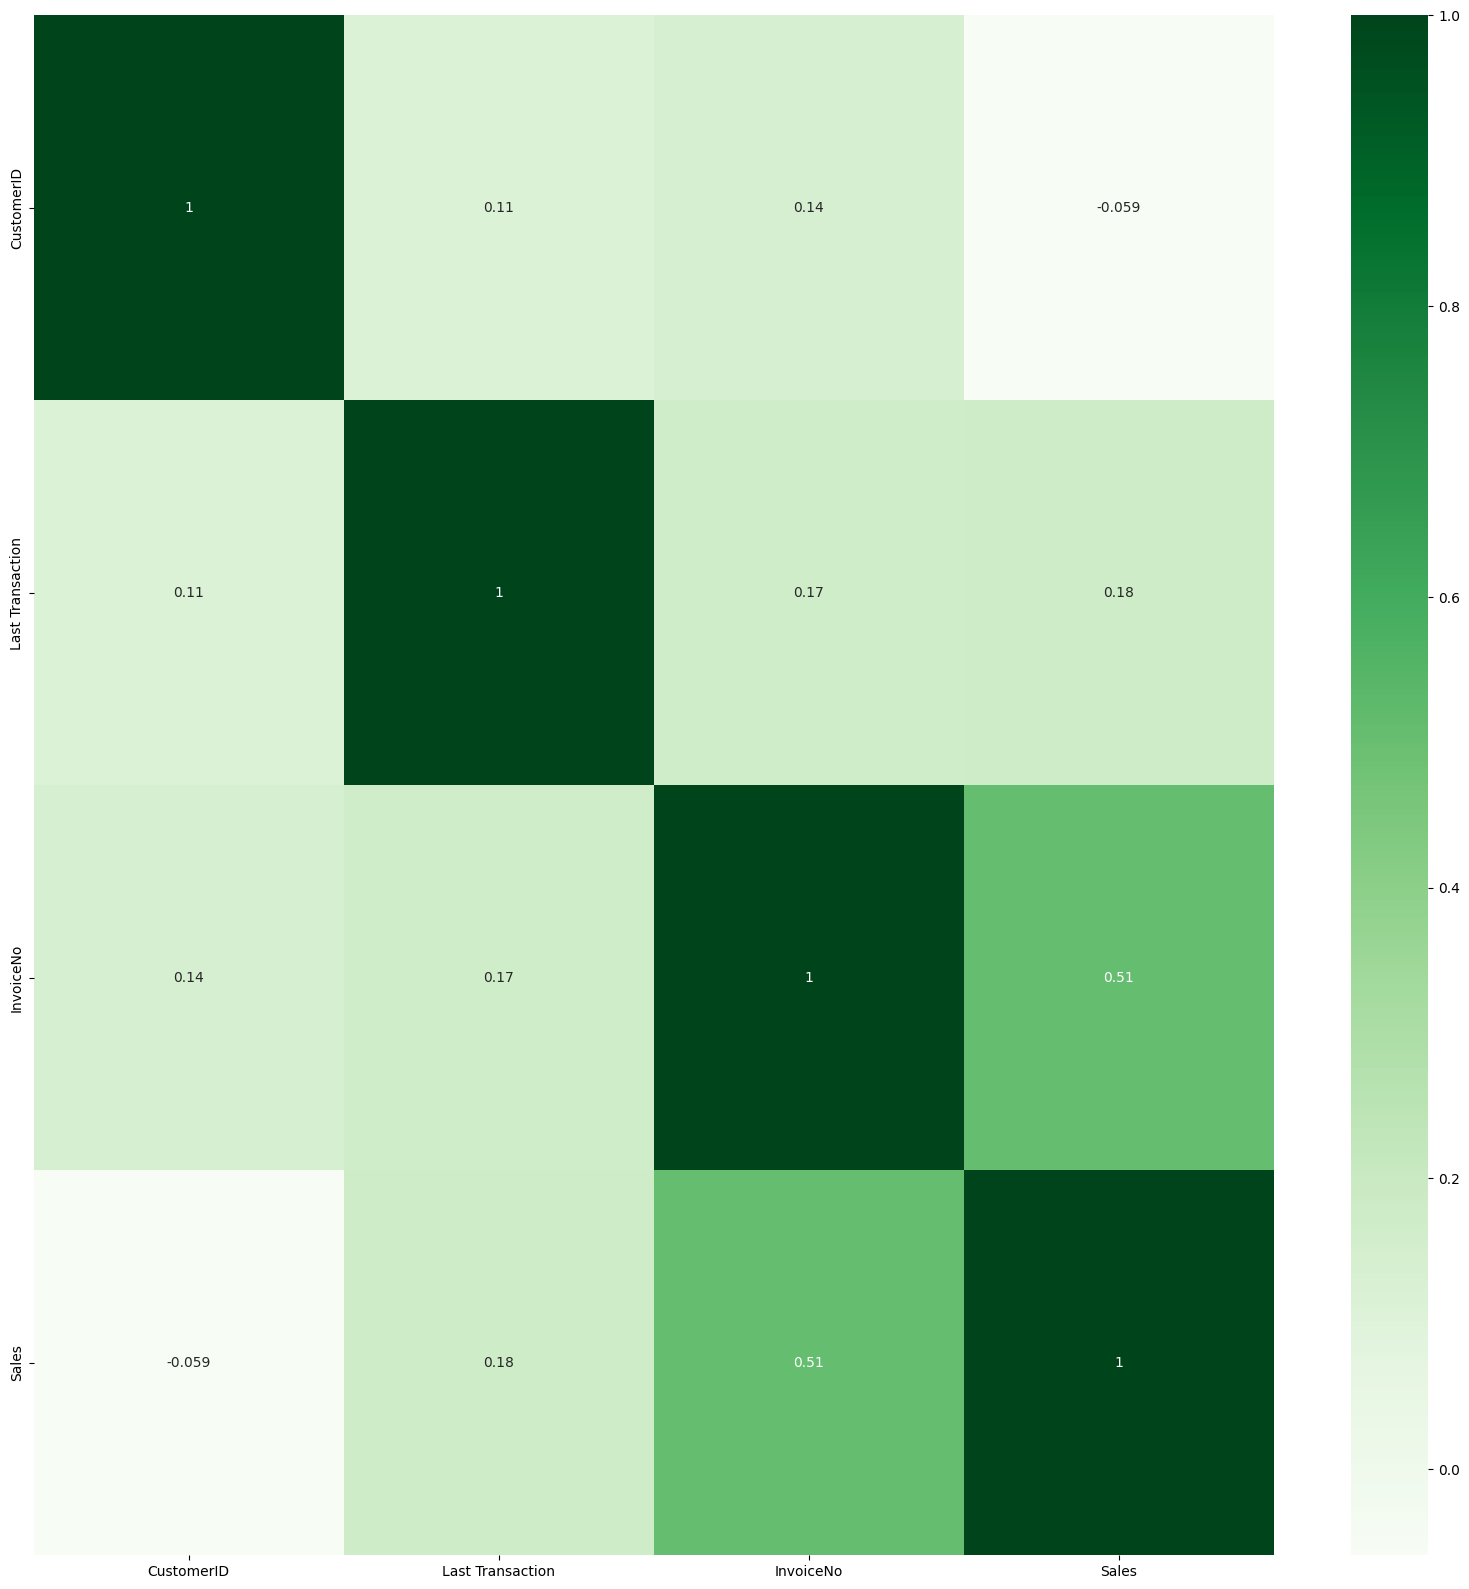

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_iqr.drop('Country', axis=1).corr(),cmap='Greens',annot=True)
plt.show()

Normalization of given dataset using MinMaxScalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
new2_df=new_df_iqr[['Last Transaction','InvoiceNo','Sales']]
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(new2_df)
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=['Last Transaction','InvoiceNo','Sales']
scaled_df['Country']=new_df_iqr['Country']
scaled_df

,Last Transaction,InvoiceNo,Sales,Country
0,0.902778,0.183230,0.757995,Iceland
1,0.777778,0.068323,0.715224,Finland
2,0.111111,0.049689,0.213119,Norway
3,0.125000,0.040373,0.232415,Austria
4,0.694444,0.208075,0.799334,Belgium
...,...,...,...,...
1305,0.111111,0.062112,0.222620,United Kingdom
1306,0.888889,0.018634,0.239890,United Kingdom
1307,0.777778,0.111801,0.502795,United Kingdom
1308,0.888889,0.018634,0.107182,United Kingdom


K Means Clustering - Plot the graph using elbow method

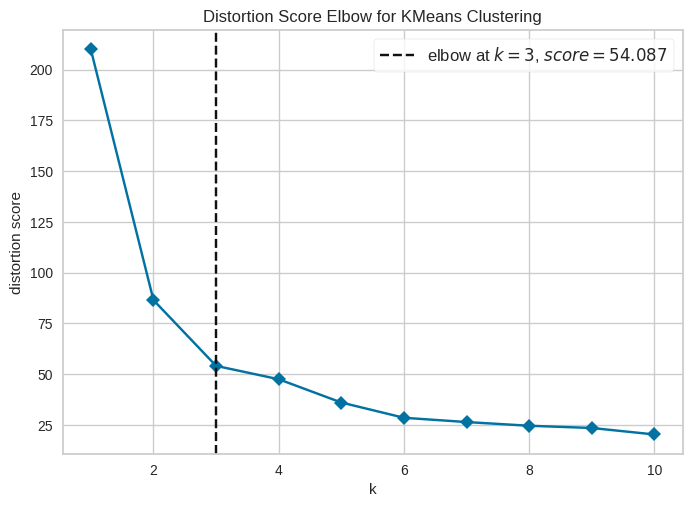

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
#import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
# creating an instance of the KMeans class with default parameters.
Visualizer=KElbowVisualizer(model,k=(1,11),timings=False)
Visualizer.fit(df_k)
Visualizer.show()

In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_k)
df_k['Clusters']=y_predicted
df_k

,Last Transaction,InvoiceNo,Sales,Clusters
0,0.902778,0.183230,0.757995,2
1,0.777778,0.068323,0.715224,2
2,0.111111,0.049689,0.213119,1
3,0.125000,0.040373,0.232415,1
4,0.694444,0.208075,0.799334,2
...,...,...,...,...
1305,0.111111,0.062112,0.222620,1
1306,0.888889,0.018634,0.239890,0
1307,0.777778,0.111801,0.502795,2
1308,0.888889,0.018634,0.107182,0


In [ ]:
km.cluster_centers_

array([[0.88245507, 0.0699557 , 0.19008301],
       [0.25967215, 0.06966658, 0.22545129],
       [0.84983728, 0.1830349 , 0.62795234]])

Model Evaluation

In [ ]:
km.labels_

array([2, 2, 1, ..., 2, 0, 1], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
score=silhouette_score(df_k,km.labels_,metric='euclidean')
print(score)

0.7950187022526829


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchical = hierarchical.fit_predict(df_k)
df_k['clusters_hierarchical']= y_predicted_hierarchical
df_k.head(20)

,Last Transaction,InvoiceNo,Sales,Clusters,clusters_hierarchical
0,0.902778,0.183230,0.757995,2,2
1,0.777778,0.068323,0.715224,2,2
2,0.111111,0.049689,0.213119,1,0
3,0.125000,0.040373,0.232415,1,0
4,0.694444,0.208075,0.799334,2,2
5,0.902778,0.027950,0.256247,0,1
6,0.347222,0.074534,0.354293,1,0
7,0.430556,0.065217,0.408060,1,0
8,0.958333,0.093168,0.433886,2,2
9,0.013889,0.012422,0.053320,1,0


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, hierarchical.labels_, metric='euclidean')
print(score)

0.8506803033764555


In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,min_samples = 4 )
y_predicted_dbscan = dbscan.fit_predict(df_k)
df_k['clusters_dbscan'] = y_predicted_dbscan
df_k

,Last Transaction,InvoiceNo,Sales,Clusters,clusters_hierarchical,clusters_dbscan
0,0.902778,0.183230,0.757995,2,2,0
1,0.777778,0.068323,0.715224,2,2,0
2,0.111111,0.049689,0.213119,1,0,1
3,0.125000,0.040373,0.232415,1,0,1
4,0.694444,0.208075,0.799334,2,2,0
...,...,...,...,...,...,...
1305,0.111111,0.062112,0.222620,1,0,1
1306,0.888889,0.018634,0.239890,0,1,2
1307,0.777778,0.111801,0.502795,2,2,0
1308,0.888889,0.018634,0.107182,0,1,2


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, dbscan.labels_, metric='euclidean')
print(score)

0.8710167435181604
